In [40]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [61]:
image1 = cv2.imread('image4.webp')
image2 = cv2.imread('image1.webp')

In [62]:
# Ініціалізація детектора та описувача ключових точок (використовуйте вибраний алгоритм)
detector = cv2.ORB_create()
matcher = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)

In [63]:
# Знаходження ключових точок та їх дескрипторів для обох зображень
keypoints1, descriptors1 = detector.detectAndCompute(image1, None)
keypoints2, descriptors2 = detector.detectAndCompute(image2, None)

In [64]:
# Збірка та знаходження відповідностей
matches = matcher.match(descriptors1, descriptors2)

In [65]:
# Сортування відповідностей за відстанню
matches = sorted(matches, key=lambda x: x.distance)

In [66]:
# Обмеження кількості точок відповідності, які ви хочете використовувати
num_matches_to_use = 100
matches = matches[:num_matches_to_use]

In [67]:
# Отримання координат ключових точок для відповідних відповідностей
points1 = np.float32([keypoints1[m.queryIdx].pt for m in matches])
points2 = np.float32([keypoints2[m.trainIdx].pt for m in matches])

In [68]:
# Знаходження гомографічного перетворення
homography_matrix, _ = cv2.findHomography(points2, points1, cv2.RANSAC)

In [69]:
# Застосування гомографічного перетворення до image2
result_image = cv2.warpPerspective(image2, homography_matrix, (image1.shape[1], image1.shape[0]))

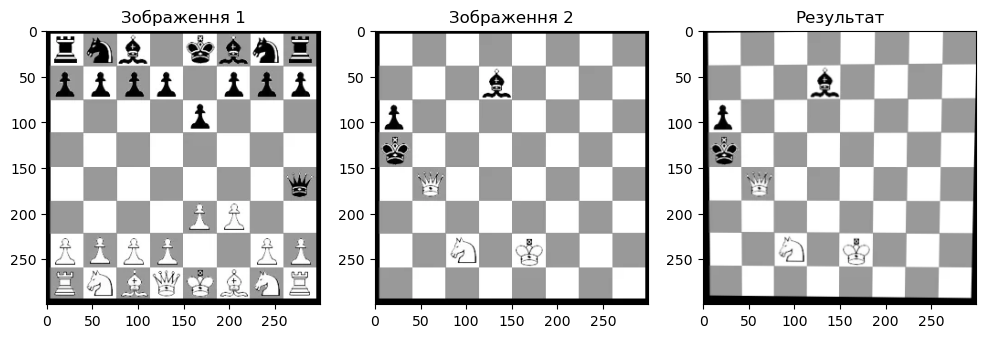

In [70]:
# Візуалізація результатів
plt.figure(figsize=(12, 6))
plt.subplot(131), plt.imshow(image1, cmap='gray'), plt.title('Зображення 1')
plt.subplot(132), plt.imshow(image2, cmap='gray'), plt.title('Зображення 2')
plt.subplot(133), plt.imshow(result_image, cmap='gray'), plt.title('Результат')
plt.show()

In [39]:
# Збереження результату
cv2.imwrite('result_image.jpg', result_image)

True